In [18]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pytz
import copy
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pytz.all_timezones
pytz.timezone("Australia/West")
pytz.common_timezones

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', 'Africa/Lagos', 'Africa/Libreville', 'Africa/Lome', 'Africa/Luanda', 'Africa/Lubumbashi', 'Africa/Lusaka', 'Africa/Malabo', 'Africa/Maputo', 'Africa/Maseru', 'Africa/Mbabane', 'Africa/Mogadishu', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Niamey', 'Africa/Nouakchott', 'Africa/Ouagadougou', 'Africa/Porto-Novo', 'Africa/Sao_Tome', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'America/Adak', 'America/Anchorage', 'Amer

In [3]:
test = datetime.now(tz=pytz.timezone("Australia/West")).astimezone(pytz.UTC)
test

datetime.datetime(2025, 5, 8, 8, 16, 15, 400336, tzinfo=<UTC>)

In [4]:
with open("HD01D_Data_008297_9999999910795325.txt", "r") as f:
    data = f.readlines()

In [5]:
from datetime import tzinfo


class nn_rain:
    def __init__(self, data):
        self._import_csv(data)

    def __getitem__(self, key):
        child = copy.copy(self)
        child.timestamp = self.timestamp[key]
        child.meas_period = self.meas_period[key]
        child.precipation = self.precipation[key]
        child.quality = self.quality[key]
        
        return child

    @staticmethod
    def _parse_date(date: list) -> float:
        tz_local = pytz.timezone("Australia/West")
        date = [int(i) for i in date]
        date_datetime = datetime(*date, tzinfo=tz_local)
        return date_datetime.timestamp()


    def _import_csv(self, path):
        date_idx = slice(2, 7)
        precip_idx = 7
        quality_idx = 8
        meas_period_idx = 9
        
        with open(path, "r") as f:
            data = f.readlines()
        self.header = data[0]
        self.station = int(data[1].split(",")[1])

        timestamp = []
        precip = []
        quality = []
        meas_period = []

        for line in data[1:]:
            try:
                # Parse data before appending
                ls = line.split(",")
                ts_val = self._parse_date(ls[date_idx])
                precip_val = float(ls[precip_idx])
                quality_val = ls[quality_idx]
                meas_period_val = int(ls[meas_period_idx])

                timestamp.append(ts_val)
                precip.append(precip_val)
                quality.append(quality_val)
                meas_period.append(meas_period_val)
            except ValueError as e:
                pass
                
        self.timestamp = np.array(timestamp)
        self.precipation = np.array(precip)
        self.quality = np.array(quality)
        self.meas_period = np.array(meas_period)
        




        



In [6]:
nn = nn_rain("HD01D_Data_008297_9999999910795325.txt")

(0.0, 2.0)

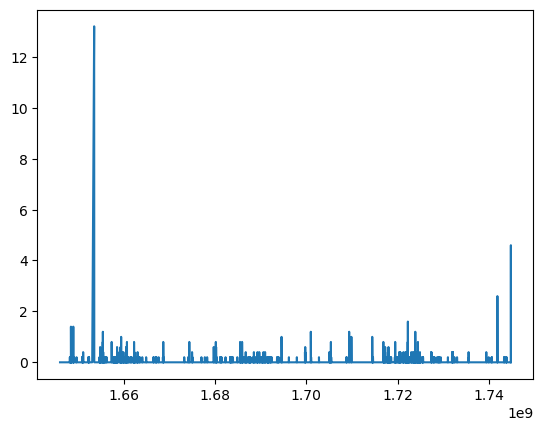

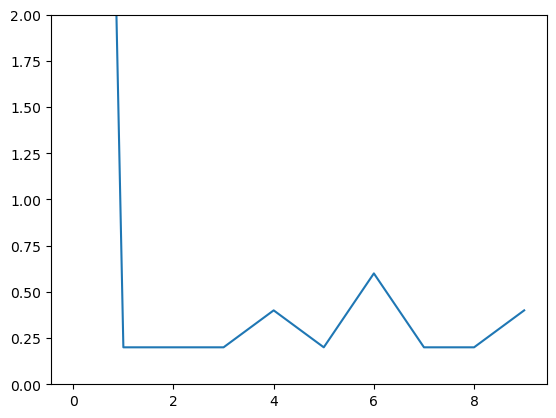

In [7]:
plt.plot(nn.timestamp, nn.precipation)
mask = nn.precipation >= 0.1
mask2 = nn.meas_period > 1
np.mean(nn.precipation[mask])
plt.figure()
plt.plot(nn.precipation[mask2 & mask])
plt.ylim(0,2)

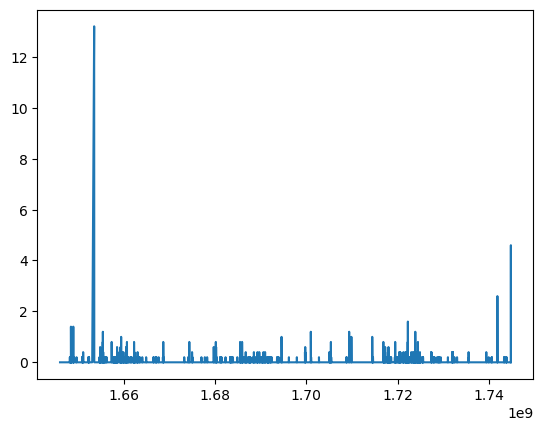

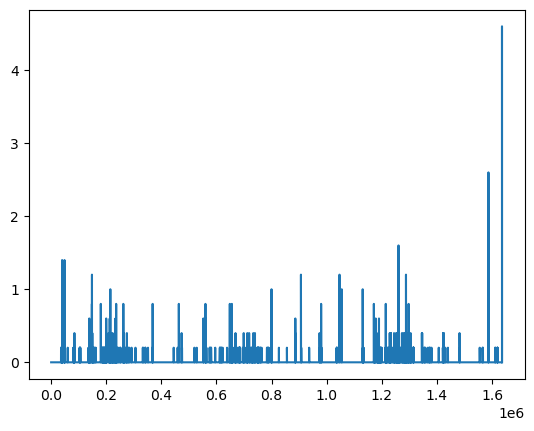

In [ ]:
mask2 = nn.meas_period == 1
nn[mask2].precipation.size

plt.plot(nn.timestamp, nn.precipation)
np.mean(nn.precipation[mask2])
plt.figure()
plt.plot(nn.precipation[mask2])


In [17]:
val = nn.precipation[mask2]
def get_state(state_values, curr_value):
    return np.where(np.isclose(state_values, curr_value))[0][0]

states_values = np.unique(val)
print(states_values)
s_range = np.arange(len(states_values))
print(s_range)

state_counter = np.zeros((len(states_values),len(states_values)),dtype=np.float32)

prev_state = get_state(states_values, val[0])
for i in tqdm(range(1, len(val))):
    gcs = get_state(states_values, val[i])
    state_counter[prev_state, gcs] += 1
    prev_state = gcs

P = state_counter

P = state_counter
for i in range(len(states_values)):
    state_sum = np.sum(P[i,:])
    if state_sum > 0:
        P[i,:] = P[i,:] / state_sum
print(P)

[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 2.2 2.4 2.6 4.6]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12]


100%|██████████| 1636250/1636250 [00:41<00:00, 39328.12it/s]

[[9.9829477e-01 1.6629691e-03 3.4300654e-05 5.5126047e-06 1.8375349e-06
  0.0000000e+00 0.0000000e+00 6.1251166e-07 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [8.3379245e-01 1.3314968e-01 2.6323844e-02 4.2852769e-03 1.5304561e-03
  3.0609121e-04 6.1218243e-04 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [2.4778761e-01 4.2477876e-01 2.1238938e-01 7.5221241e-02 3.0973451e-02
  8.8495575e-03 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [4.4117648e-02 1.7647059e-01 3.0882353e-01 2.2058824e-01 2.2058824e-01
  1.4705882e-02 0.0000000e+00 1.4705882e-02 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [2.7027028e-02 1.8918920e-01 2.7027026e-01 2.4324325e-01 1.0810811e-01
  8.1081077e-02 5.4054055e-02 2.7027028e-02 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 2.8571430e-01 2.1428572e-

In [27]:
np.save('nn_model.npy', P)
np.save('nn_states.npy', states_values)
G_states = np.arange(0.0, 1.8, 0.1)


fig = plt.figure(figsize=(10, 10))

sns.heatmap(P, 
            annot=True, 
            fmt=".4f", 
            cmap="viridis", 
            xticklabels=states_values, 
            yticklabels=states_values,)

plt.xlabel("Next State")
plt.ylabel("Current State")
plt.title("Markov Transition Matrix Heatmap")
plt.tight_layout()
plt.show()

In [ ]:
states = np.zeros(len(val), dtype=np.int8)
fake_rain = np.zeros_like(val)
for i in tqdm(range(1, len(val))):
    prev_state = states[i-1]
    curr_state = np.random.choice(s_range,1,True,P[prev_state,:])
    states[i] = curr_state[0]
    fake_rain[i] = states_values[curr_state]


  0%|          | 0/1636250 [00:00<?, ?it/s]/tmp/ipykernel_751591/3902317613.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  states[i] = curr_state
/tmp/ipykernel_751591/3902317613.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fake_rain[i] = states_values[curr_state]
100%|██████████| 1636250/1636250 [00:47<00:00, 34511.08it/s]


In [25]:
%matplotlib tk
plt.figure()
plt.scatter(np.arange(len(val)), val, color='tab:blue', label = 'Real data', marker='x')
plt.scatter(np.arange(len(val)), fake_rain, color='tab:orange', label = 'markov data', marker='x')
plt.legend()

/home/dyb/miniconda3/envs/godot/lib/python3.12/tkinter/__init__.py:862: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args)
